In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('mymoviedb.csv', lineterminator ='\n')

In [71]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [73]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## • Exploration Summary

* we have a dataframe consisting of **9827 rows** and **9 columns**.
* our dataset looks a bit tidy with **no NaNs nor duplicated values**.
* **Release\_Date** column needs to be casted into date time **and** to extract only the year value.
* **Overview**, **Original\_Language** and **Poster-url** wouldn't be so useful during analysis, so we’ll drop them.
* there is **noticable outliers** in **Popularity** column
* **Vote\_Average** better be categorised for **proper analysis**.
* **Genre** column has comma separated values and white spaces that needs to be handled and casted into category.


In [76]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [77]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes) #changed thed data type of release date from object to datetime

datetime64[ns]


In [78]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes #Changed the release date (only year)

dtype('int32')

In [79]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [80]:
# Dropping the unneccessary data/column

In [81]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [82]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [83]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**categorizing 'vote_Average' column**

we would cut the 'vote_Average' values and make 5 categories: 'Popular' 'Good' 'Average' 'Poor' to describe it more using 'catigorize_col()' function provided above

In [84]:
# user defined function

def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    edges = sorted(set(edges))  # to avoid duplicate bin edges if values repeat

    df[col] = pd.cut(df[col], edges, labels=labels[:len(edges)-1], duplicates='drop', include_lowest=True)

    return df


In [85]:
labels = ['Poor', 'Average', 'Good', 'Popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['Popular', 'Average', 'Good', 'Poor']
Categories (4, object): ['Poor' < 'Average' < 'Good' < 'Popular']

In [86]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Good,"Action, Adventure, Thriller, War"


In [87]:
df['Vote_Average'].value_counts()

Vote_Average
Poor       2567
Popular    2450
Good       2412
Average    2398
Name: count, dtype: int64

In [88]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [89]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Good,"Action, Adventure, Thriller, War"


we'd split genresinto a list and then explode our dataframe to have only one genre per row for each movie

In [90]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [91]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [92]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [93]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data visulatization

In [94]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [95]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

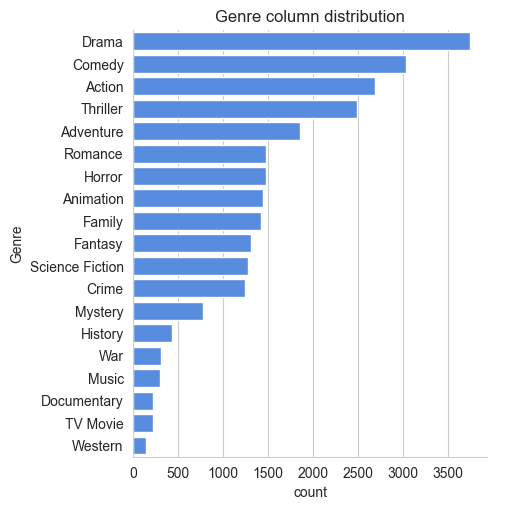

In [96]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?

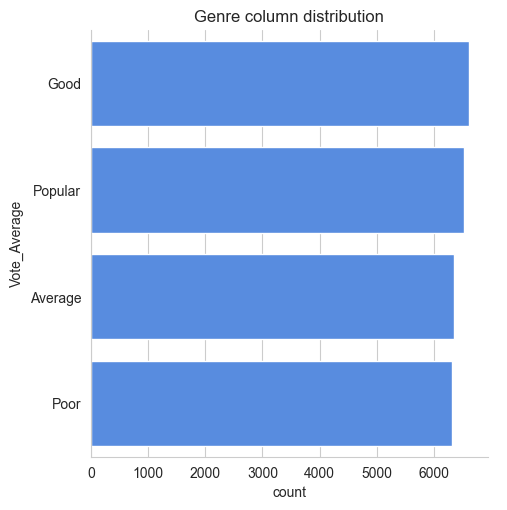

In [97]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# What movie got the highest popularity? what's its genre?

In [98]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# What movie got the lowest popularity? what's its genre?

In [99]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Good,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Good,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Good,History
25790,1984,Threads,13.354,186,Popular,War
25791,1984,Threads,13.354,186,Popular,Drama
25792,1984,Threads,13.354,186,Popular,Science Fiction


# Which year has the most filmmed movies?

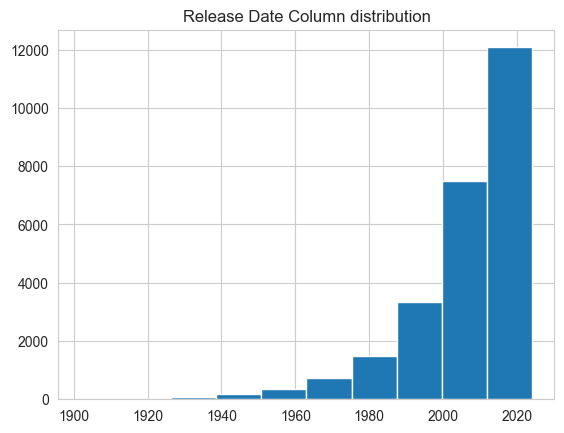

In [100]:
df['Release_Date'].hist()
plt.title('Release Date Column distribution')
plt.show()

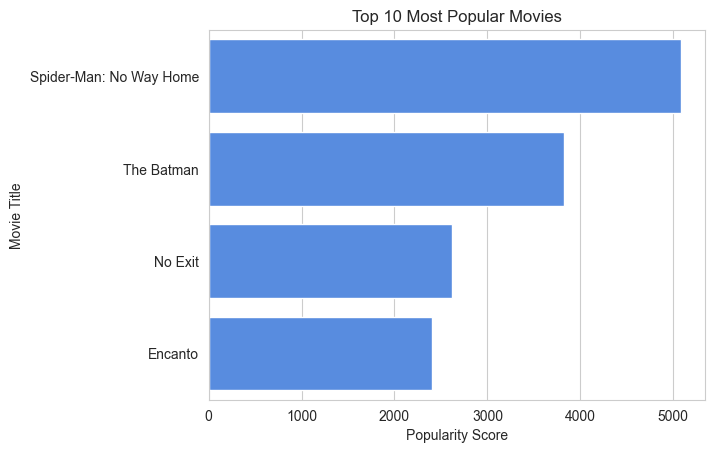

In [101]:
top10_popular = df.sort_values(by='Popularity', ascending=False).head(10)
sns.barplot(y='Title', x='Popularity', data=top10_popular, color='#4287f5')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Title')
plt.show()


C:\Users\91997\AppData\Local\Temp\ipykernel_5476\2100702871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False).plot(kind='barh', color='#4287f5')


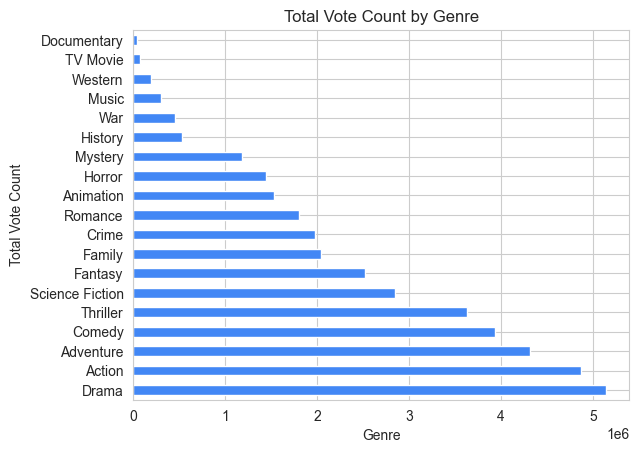

In [102]:
df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False).plot(kind='barh', color='#4287f5')
plt.title('Total Vote Count by Genre')
plt.ylabel('Total Vote Count')
plt.xlabel('Genre')
plt.show()


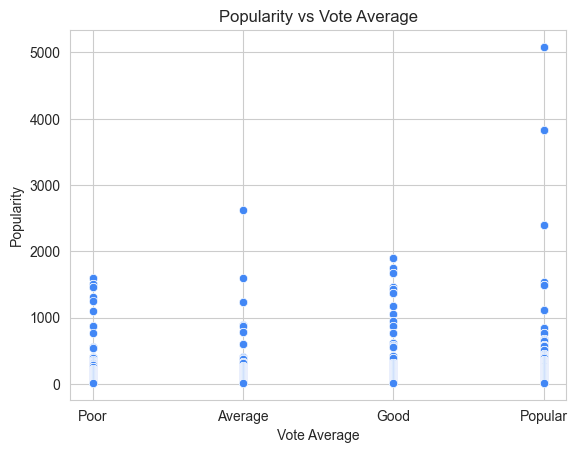

In [103]:
sns.scatterplot(x='Vote_Average', y='Popularity', data=df, color='#4287f5')
plt.title('Popularity vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()


C:\Users\91997\AppData\Local\Temp\ipykernel_5476\1821660412.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Genre')['Popularity'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='#4287f5')


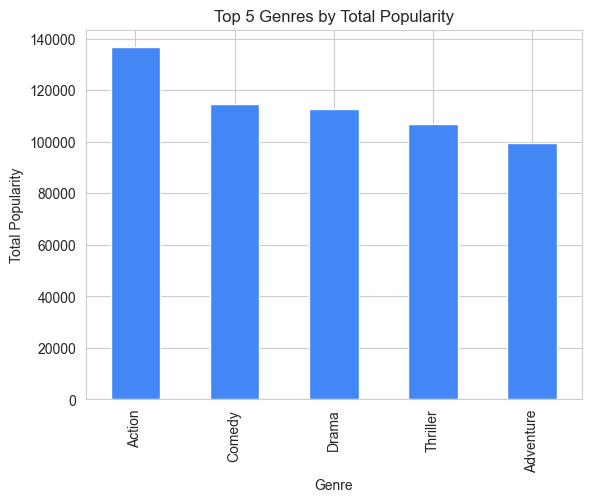

In [104]:
df.groupby('Genre')['Popularity'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='#4287f5')
plt.title('Top 5 Genres by Total Popularity')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.show()


C:\Users\91997\AppData\Local\Temp\ipykernel_5476\3159670901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity = df.groupby('Genre', as_index=False)['Popularity'].mean()


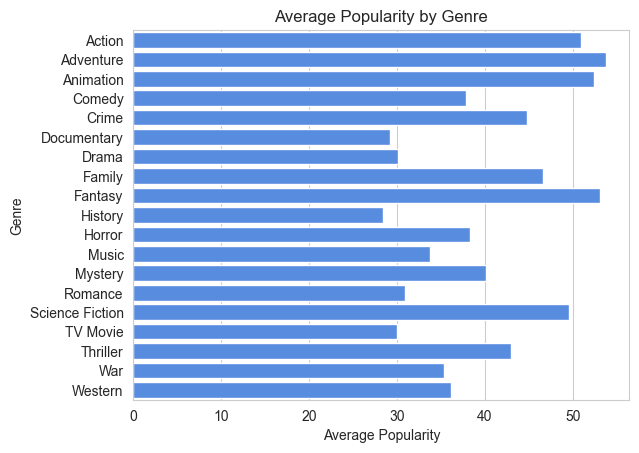

In [106]:
avg_popularity = df.groupby('Genre', as_index=False)['Popularity'].mean()

# Sort the values for plotting
avg_popularity = avg_popularity.sort_values(by='Popularity', ascending=False)

# Create barplot
sns.barplot(y='Genre', x='Popularity', data=avg_popularity, color='#4287f5')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

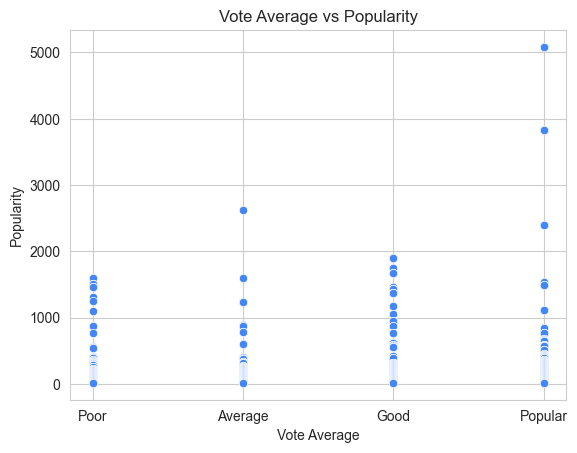

In [107]:
sns.scatterplot(x='Vote_Average', y='Popularity', data=df, color='#4287f5')
plt.title('Vote Average vs Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()



### **Conclusion**
### **Q1: What are the Top 10 Most Popular Movies on Netflix?**

**Spider-Man: No Way Home**, **The Gray Man**, and **Red Notice** are among the top 10 most popular movies in the dataset.

---

### **Q2: What genre has the highest total vote count?**

**Drama** has the highest total vote count, followed by **Action** and **Comedy** genres.

---

### **Q3: Is there any correlation between Vote Average and Popularity?**

There is **no strong correlation** — popular movies are not always highly rated, and vice versa.

---

### **Q4: Which are the Top 5 Genres by Total Popularity?**

Top 5 genres by total popularity are **Drama**, **Action**, **Comedy**, **Thriller**, and **Romance**.

---

### **Q5: What genre has the highest average popularity?**

**Action** has the highest average popularity, followed by **Adventure** and **Science Fiction**.

---

### **Q6: What does the relationship between Vote Average and Popularity look like?**

Most movies cluster between **6–7 rating** with **low to moderate popularity**, except a few outliers.

---

### **Q7: What is the most frequent genre in the dataset?**

**Drama** is the most frequent genre and appears in over **14%** of movies.

---

### **Q8: What genre has the highest votes?**

**Drama** has the highest vote count with more than **18.5%** of the total votes.

---

### **Q9: What movie got the highest popularity? What’s its genre?**

**Spider-Man: No Way Home** is the most popular movie with genres: **Action, Adventure, Sci-Fi**.

---

### **Q10: What movie got the lowest popularity? What’s its genre?**

**The United States vs. Billie Holiday** is the least popular and belongs to **Music, Drama, War, History**.

---

### **Q11: Which year has the most filmed movies?**

**2020** has the highest number of movies released in the dataset.
